# STUDENT PERFORMANCE INDICATOR

# Life cycle of Machine Learning Project

1. Understanding the Problem Statement
2. Data Collection
3. Data Checks to perform
4. Exploratory Data Analysis
5. Data Pre-Processing
6. Model Training
7. Choose best model

# 1) Problem Statement

* This project understands the student's performance (test scores) is affected by other variables such as Gender, Ethnicity, Parent level of education, Lunch and Test preparation course.

# 2) Data Collection

* Dataset source - https://www.kaggle.com/datasets/spscientist/students-performance-in-exams?datasetid=74977
* The data consists of 8 cols and 1000 rows


# 2.1 Import data and required packages

Importing NumPy, Pandas, Matplotlib, Seaborn and Warnings Library

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

# Import the CSV data as Pandas Dataframe

In [4]:
df = pd.read_csv('data/stud.csv')
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


# Show Top 5 cells

In [7]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


# Shape of dataset

In [8]:
df.shape

(1000, 8)

# 2.2 Dataset Information

* gender : sex of students -> (Male/female)
* race/ethnicity : ethnicity of students -> (Group A,B,C,D,E)
* parent level of education : parent's final education -> (bachelor's degree, some cllg, master's degree, associate's degree, high school)
* lunch : having lunch before test (standard or free/reduced)
* test preparation course : complete or not complete before test
* math score
* reading score
* writing score

# 3. Data Checks to Perform

* Check Missing values
* Check duplicates
* Check data type
* Check the number of unique values of each col
* Check statistics of data set
* Check various categories present in different categorical col

# 3.1 Check Missing values

In [9]:
df.isna().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

### There are no missing values in the data set

# 3.2 Check duplicates

In [10]:
df.duplicated().sum()

0

### There are no duplicate values in the data set

# 3.3 Check data types

In [ ]:
# Check null and data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


### Checking the number of unique values of each col

In [14]:
df.nunique()

gender                          2
race_ethnicity                  5
parental_level_of_education     6
lunch                           2
test_preparation_course         2
math_score                     81
reading_score                  72
writing_score                  77
dtype: int64

# 3.5 Check Statistics of the dataset

In [16]:
df.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


## Insight

* from above descp of numerical data, all means are very close to each other - between 66 and 69.16;
* all standards deviations are also close - between 14.6 and 15.19
* while there's a min score 0 for math, for writing min is much higher = 10, for reading it is even much higher = 17

# 3.7 Exploring Data

In [19]:
print("Categories in 'gender' variable:    ",end=' ')
print(df['gender'].unique())

print("Categories in 'race/ethnicity' variable:    ",end=' ')
print(df['race_ethnicity'].unique())

print("Categories in 'parental level of education' variable:    ",end=' ')
print(df['parental_level_of_education'].unique())

print("Categories in 'lunch' variable:    ",end=' ')
print(df['lunch'].unique())

print("Categories in 'test preparation course' variable:    ",end=' ')
print(df['test_preparation_course'].unique())

Categories in 'gender' variable:     ['female' 'male']
Categories in 'race/ethnicity' variable:     ['group B' 'group C' 'group A' 'group D' 'group E']
Categories in 'parental level of education' variable:     ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Categories in 'lunch' variable:     ['standard' 'free/reduced']
Categories in 'test preparation course' variable:     ['none' 'completed']


In [20]:
# define numerical and categorical columns
numerical_features = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']

# Print columns
print("we have {} numerical features : {}".format(len(numerical_features), numerical_features))
print("we have {} categorical features : {}".format(len(categorical_features), categorical_features))

we have 3 numerical features : ['math_score', 'reading_score', 'writing_score']
we have 5 categorical features : ['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course']


## 3.8 Adding cols for "Total Score" and "Average" (#feature_engineering)

In [24]:
df['total_score'] = df['math_score'] + df['reading_score'] + df['writing_score']
df['average'] = df['total_score'] / 3
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [30]:
reading_full = df[df['reading_score']==100]['average'].count()
writing_full = df[df['writing_score']==100]['average'].count()
math_full = df[df['math_score']==100]['average'].count()

print(f'Number of students with full score in reading: {reading_full}')
print(f'Number of students with full score in writing: {writing_full}')
print(f'Number of students with full score in math: {math_full}')

Number of students with full score in reading: 17
Number of students with full score in writing: 14
Number of students with full score in math: 7


In [32]:
reading_less_20 = df[df['reading_score']<=20]['average'].count()
writing_less_20 = df[df['writing_score']<=20]['average'].count()
math_less_20 = df[df['math_score']<=20]['average'].count()

print(f'Number of students with less than 20 marks in reading: {reading_less_20}')
print(f'Number of students with less than 20 marks in writing: {writing_less_20}')
print(f'Number of students with less than 20 marks in math: {math_less_20}')

Number of students with less than 20 marks in reading: 1
Number of students with less than 20 marks in writing: 3
Number of students with less than 20 marks in math: 4


# Insights

* from above values we get students have performed worst in maths
* Best performance is in reading section

# 4. Exploring Data (Visualization)

## 4.1 Visualize average score distribution to make some conclusion.

* Histogram
* Kernel Distribution Function (KDE)

### 4.1.1 Histogram & KDE

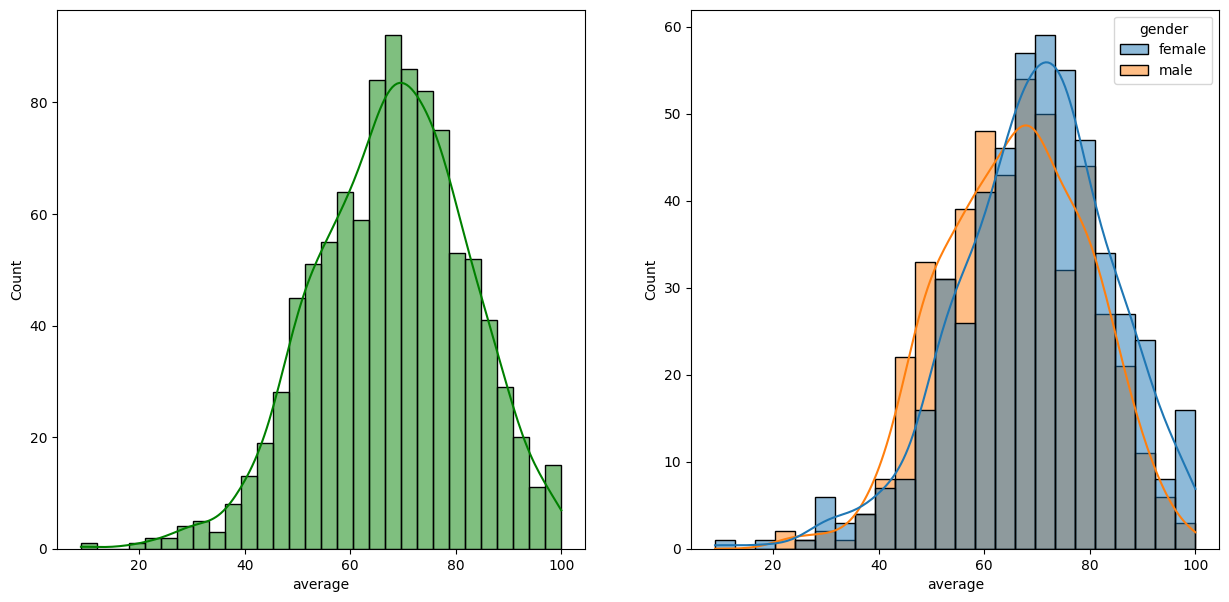

In [34]:
fig, axs = plt.subplots(1, 2, figsize=(15,7))
plt.subplot(121)
sns.histplot(data=df, x='average', bins=30, kde=True, color='g')
plt.subplot(122)
sns.histplot(data=df, x='average', kde=True, hue='gender')
plt.show()

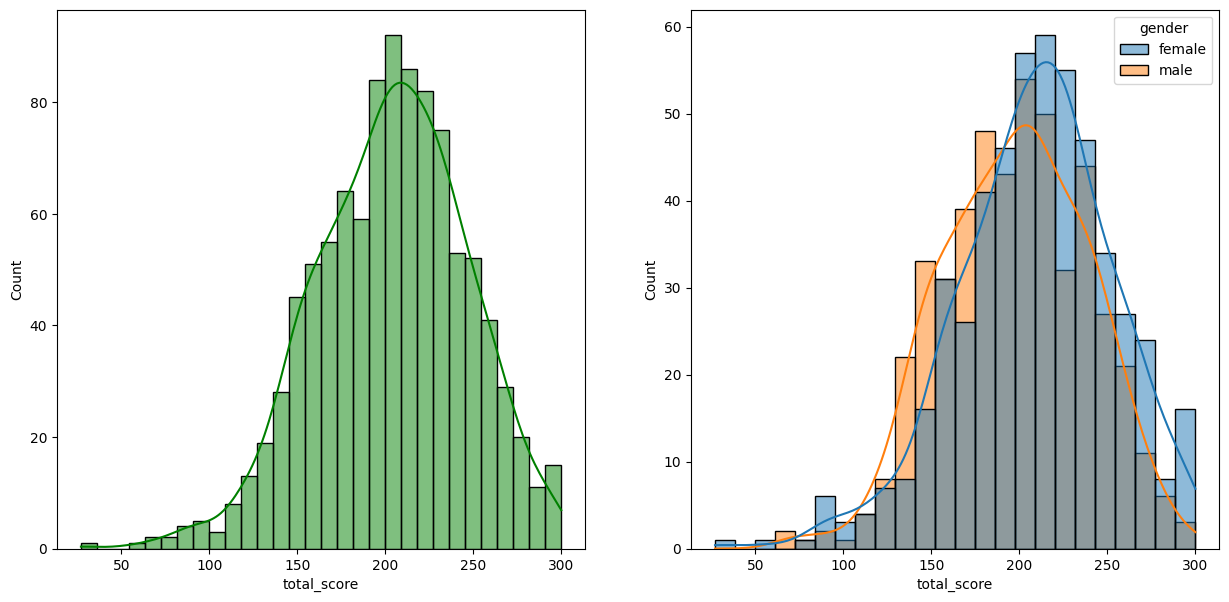

In [35]:
fig, axs = plt.subplots(1, 2, figsize=(15,7))
plt.subplot(121)
sns.histplot(data=df, x='total_score', bins=30, kde=True, color='g')
plt.subplot(122)
sns.histplot(data=df, x='total_score', kde=True, hue='gender')
plt.show()

# Insights 

* female students tends to perform better than the male students

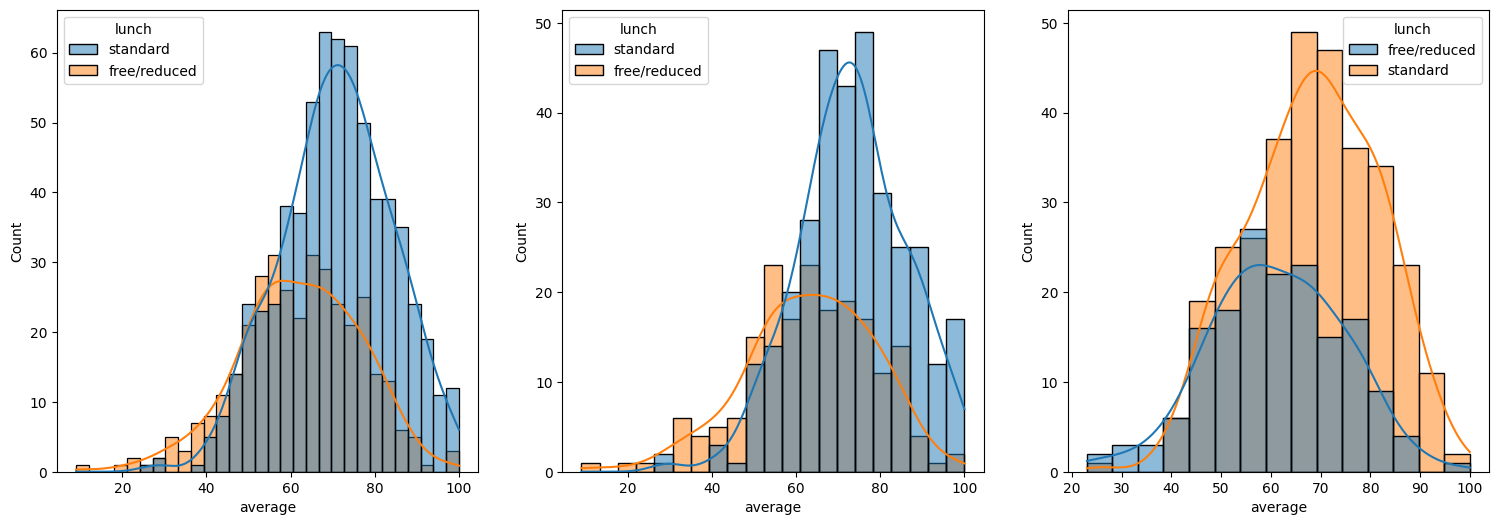

In [36]:
fig, axs = plt.subplots(1, 3, figsize=(25,6))
plt.subplot(141)
sns.histplot(data=df, x='average', bins=30, kde=True, hue='lunch')
plt.subplot(142)
sns.histplot(data=df[df.gender=='female'], x='average', kde=True, hue='lunch')
plt.subplot(143)
sns.histplot(data=df[df.gender=='male'], x='average', kde=True, hue='lunch')
plt.show()